# Spotify Audio-Based Song Recommender
A content-based recommendation system using Spotify’s 1.2M+ Songs dataset.

In [37]:
# Install pandas library
!pip install pandas

In [38]:
!pip install scikit-learn

In [39]:
!pip install matplotlib seaborn

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

In [41]:
# Load dataset
df = pd.read_csv('tracks_features.csv')

In [42]:
df.columns

Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'year', 'release_date'],
      dtype='object')

In [43]:
df.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204025 entries, 0 to 1204024
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1204025 non-null  object 
 1   name              1204022 non-null  object 
 2   album             1204014 non-null  object 
 3   album_id          1204025 non-null  object 
 4   artists           1204025 non-null  object 
 5   artist_ids        1204025 non-null  object 
 6   track_number      1204025 non-null  int64  
 7   disc_number       1204025 non-null  int64  
 8   explicit          1204025 non-null  bool   
 9   danceability      1204025 non-null  float64
 10  energy            1204025 non-null  float64
 11  key               1204025 non-null  int64  
 12  loudness          1204025 non-null  float64
 13  mode              1204025 non-null  int64  
 14  speechiness       1204025 non-null  float64
 15  acousticness      1204025 non-null  float64
 16  

In [45]:
# Check for missing values
print(df.isnull().sum())

# Remove rows with missing values (if any)
df = df.dropna()

# Check duplicates
df = df.drop_duplicates()

id                   0
name                 3
album               11
album_id             0
artists              0
artist_ids           0
track_number         0
disc_number          0
explicit             0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
year                 0
release_date         0
dtype: int64


In [46]:
# Summary statistics
df.describe()

,track_number,disc_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
count,1.204012e+06,1.204012e+06,1.204012e+06,1.204012e+06,1.204012e+06,1.204012e+06,1.204012e+06,1.204012e+06,1.204012e+06,1.204012e+06,1.204012e+06,1.204012e+06,1.204012e+06,1.204012e+06,1.204012e+06,1.204012e+06
mean,7.656363e+00,1.055906e+00,4.930547e-01,5.095332e-01,5.194165e+00,-1.180876e+01,6.714609e-01,8.438146e-02,4.467552e-01,2.828595e-01,2.015992e-01,4.279832e-01,1.176341e+02,2.488403e+05,3.832493e+00,2.007328e+03
std,5.994988e+00,2.953767e-01,1.896693e-01,2.946836e-01,3.536723e+00,6.982141e+00,4.696822e-01,1.159915e-01,3.852013e-01,3.762849e-01,1.804584e-01,2.704829e-01,3.093701e+01,1.622111e+05,5.611853e-01,1.210118e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+03,0.000000e+00,0.000000e+00
25%,3.000000e+00,1.000000e+00,3.560000e-01,2.520000e-01,2.000000e+00,-1.525400e+01,0.000000e+00,3.510000e-02,3.760000e-02,7.600000e-06,9.680000e-02,1.910000e-01,9.405400e+01,1.740890e+05,4.000000e+00,2.002000e+03
50%,7.000000e+00,1.000000e+00,5.010000e-01,5.240000e-01,5.000000e+00,-9.791000e+00,1.000000e+00,4.460000e-02,3.890000e-01,8.080000e-03,1.250000e-01,4.030000e-01,1.167260e+02,2.243400e+05,4.000000e+00,2.009000e+03
75%,1.000000e+01,1.000000e+00,6.330000e-01,7.660000e-01,8.000000e+00,-6.717000e+00,1.000000e+00,7.230000e-02,8.610000e-01,7.190000e-01,2.450000e-01,6.440000e-01,1.370460e+02,2.858400e+05,4.000000e+00,2.015000e+03
max,5.000000e+01,1.300000e+01,1.000000e+00,1.000000e+00,1.100000e+01,7.234000e+00,1.000000e+00,9.690000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.489340e+02,6.061090e+06,5.000000e+00,2.020000e+03


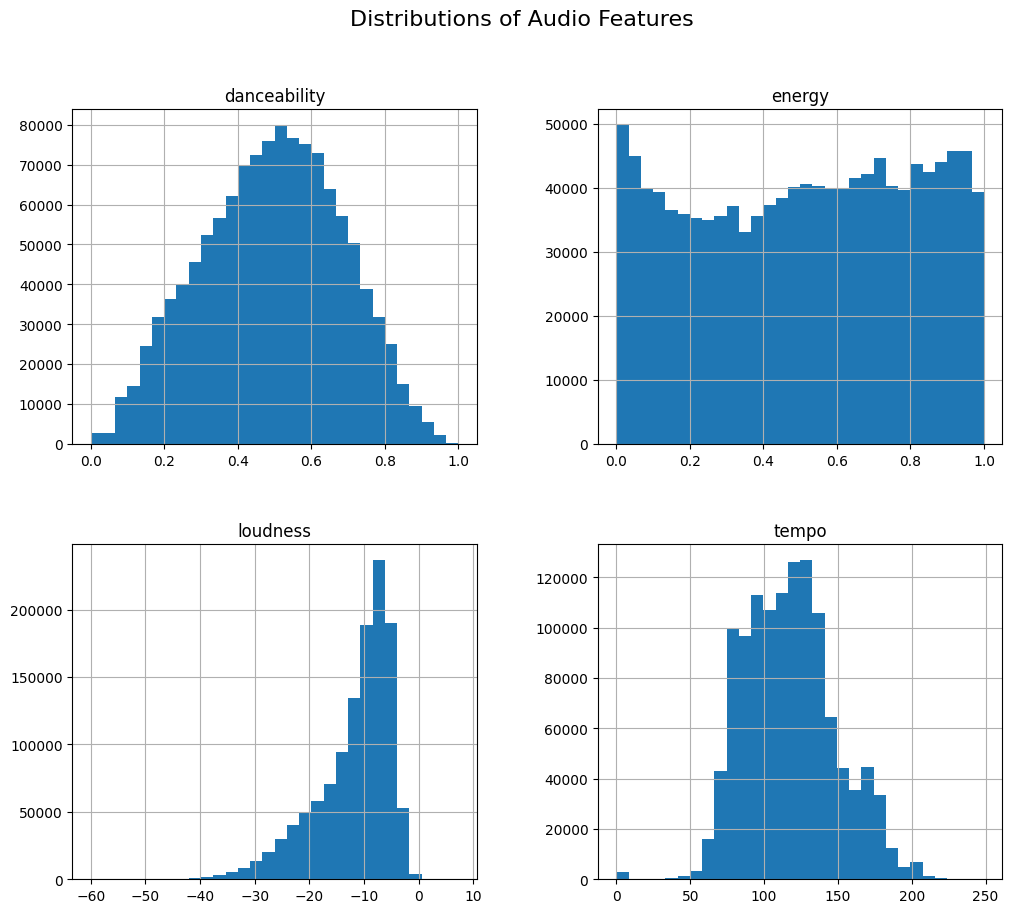

In [47]:
# Visualize distributions
features = ['danceability', 'energy', 'loudness', 'tempo']
df[features].hist(figsize=(12, 10), bins=30)
plt.suptitle('Distributions of Audio Features', fontsize=16)
plt.show()

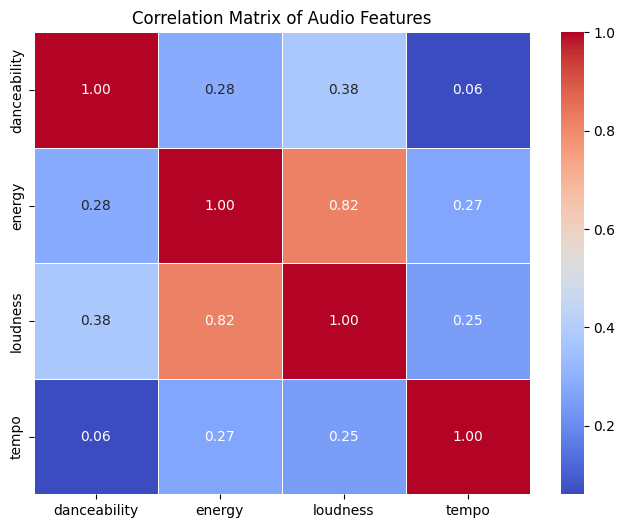

In [48]:
# Correlation heatmap
corr = df[features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Audio Features')
plt.show()

In [49]:
# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_selected[['danceability', 'energy', 'loudness', 'tempo', 'valence']])
df_selected_scaled = df_selected.copy()
df_selected_scaled[['danceability', 'energy', 'loudness', 'tempo', 'valence']] = scaled_features

# Sample for efficient computation
df_sample = df_selected_scaled.sample(n=5000, random_state=42).reset_index(drop=True)

# Fit Nearest Neighbors model
features = ['danceability', 'energy', 'loudness', 'tempo', 'valence']
feature_matrix = df_sample[features]
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(feature_matrix)

# Function to recommend similar songs
def recommend_similar_songs(song_name, n_recommendations=10):
    matches = df_sample[df_sample['name'].str.contains(song_name, case=False, na=False)]
    if matches.empty:
        print("No matching songs found.")
        return

    for i, row in matches.iterrows():
        print(f"\nInput Song: {row['name']} by {row['artists']}")
        distances, indices = model.kneighbors([feature_matrix.iloc[i]], n_neighbors=n_recommendations + 1)

        print("\nRecommended Songs:")
        for idx in indices[0][1:]:
            print(f" - {df_sample.iloc[idx]['name']} by {df_sample.iloc[idx]['artists']}")
        break

# 🔍 Example usage
recommend_similar_songs("bad guy")

No matching songs found.
